In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.fft import fftfreq
from scipy.fft import fft
import numpy as np
from astropy.timeseries import LombScargle
import scipy
%matplotlib inline

In [2]:
file = fits.open("flare566801.fits")

In [3]:
print(file)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f6c865124f0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f6c86512850>]


In [4]:
time = file[1].data["time"]
flux = file[1].data["flux"]
#print(flux)

In [5]:
#print(time)

In [6]:
#print(flux)

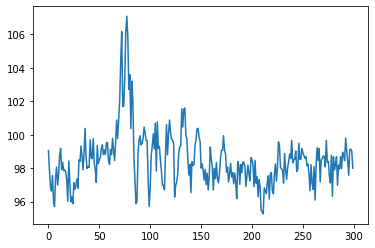

In [7]:
plt.plot(time,flux)

In [8]:
#DFT

ft = fft(flux)
freq = fftfreq(len(time), 1)

ft_pos = ft[freq>0]
freq_pos = freq[freq>0]

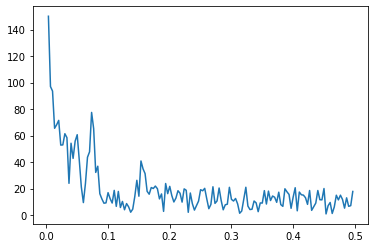

In [9]:
plt.plot(freq_pos, np.abs(ft_pos))

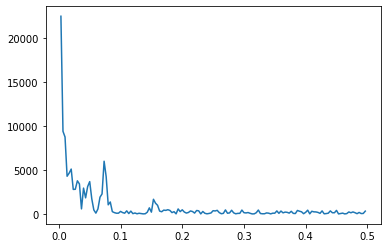

In [10]:
plt.plot(freq_pos, np.abs(ft_pos**2))

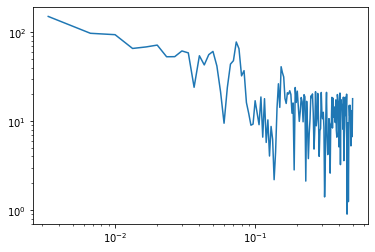

In [11]:
plt.loglog(freq_pos, np.abs(ft_pos))

Lomb Scargle

1) With autopower

In [ ]:
# autopower:- determines power for automatically determined frequencies
# here the max limit is given of 0.5

Text(0, 0.5, 'power')

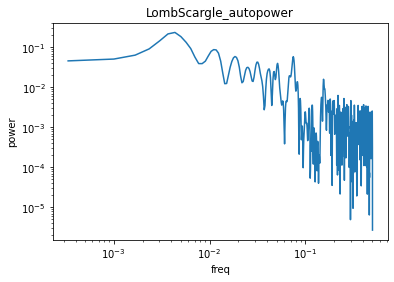

In [16]:
frequency, power = LombScargle(time, flux).autopower(maximum_frequency =0.5) #max freq is the x_limit actually
plt.title("LombScargle_autopower")
plt.loglog(frequency,np.abs(power))
#plt.loglog(frequency,power)  #shows same plot 
plt.xlabel("freq")
plt.ylabel("power")

Text(0, 0.5, 'power')

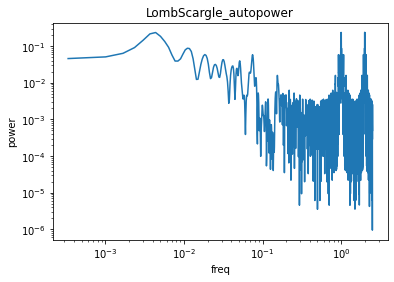

In [28]:
#with no max limit 
#no middle line

frequency, power = LombScargle(time, flux).autopower()
plt.title("LombScargle_autopower")
plt.loglog(frequency,np.abs(power))
#plt.loglog(frequency,power)  #shows same plot 
plt.xlabel("freq")
plt.ylabel("power")

Text(0, 0.5, 'power')

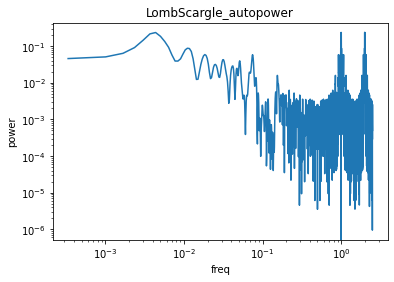

In [30]:
# no max limit 
# no abs values
# gives middle line

frequency, power = LombScargle(time, flux).autopower()
plt.title("LombScargle_autopower")
plt.loglog(frequency,power)
#plt.loglog(frequency,power)  #shows same plot 
plt.xlabel("freq")
plt.ylabel("power")

2) With Nyquist factor

In [ ]:
# Nyquist factor chooses multiple of the sampling frequency, 
# in this case its "print(len(freq1)) = 751" points
# 300*2.5 = 751 (300 no. of points in the x_axis)
# if Nyquist factor = 2, then len = 1501 (twice) and x_lim is till 1
# as Nyquist factor increases, the len is multiple of 750 and x_lim also increases

In [ ]:
# autofrequency :- determines frequency grid (i.e. x_lim)
# power :- determines power as per given frequencies

Text(0, 0.5, 'power1')

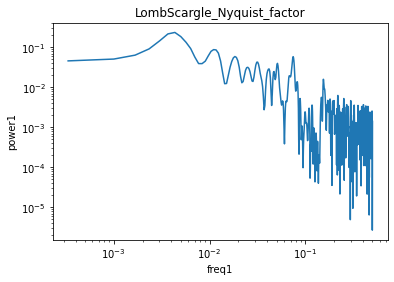

In [24]:
freq1 = LombScargle(time, flux).autofrequency(nyquist_factor=1)
power1 = LombScargle(time, flux).power(freq1)  #computes power for the frequency range we provide
plt.title("LombScargle_Nyquist_factor")
plt.loglog(freq1,power1)
plt.xlabel("freq1")
plt.ylabel("power1")

Text(0, 0.5, 'power1')

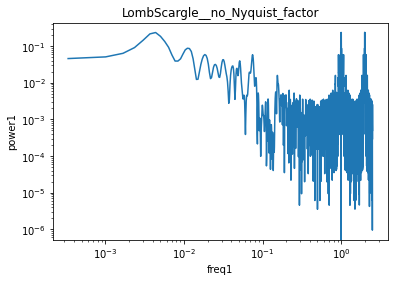

In [27]:
# when nothing provided gives automated values
# same as autopower with no max limit and no abs values

freq1 = LombScargle(time, flux).autofrequency() #nothing provided
power1 = LombScargle(time, flux).power(freq1)   #computes power for the frequency range we provide
plt.title("LombScargle__no_Nyquist_factor")
plt.loglog(freq1,power1)
plt.xlabel("freq1")
plt.ylabel("power1")